In [15]:
import pandas as pd
import numpy as np
import string
from sklearn.tree import DecisionTreeClassifier

df = pd.read_csv("datasets\passwords.csv")
df

,password,strength
0,yrtzuab476,1
1,yEdnN9jc1NgzkkBP,2
2,sarita99,1
3,Suramerica2015,2
4,PPRbMvDIxMQ19TMo,2
...,...,...
99995,aulona044,1
99996,5201314ding,1
99997,isaac19725,1
99998,toji25,0


In [16]:
def getLen(password):
    return len(password)

def upperCount(password):
    count = 0
    for i in password:
        if i.isupper():
            count+=1
    return count

def lowerCount(password):
    count = 0
    for i in password:
        if i.islower():
            count+=1
    return count

def specialCount(password):
    count = 0
    for i in password:
        if i in string.punctuation:
            count+=1
    return count

def numCount(password):
    count = 0
    for i in password:
        if i.isnumeric():
            count+=1
    return count

def startWithCaps(password):
    return 1 if password[0].isupper() else 0

def startWithNum(password):
    return 1 if password[0].isnumeric() else 0
    

In [17]:
df["len"] = df["password"].apply(getLen)
df["lowers"] = df["password"].apply(lowerCount)
df["uppers"] = df["password"].apply(upperCount)
df["specialchar"] = df["password"].apply(specialCount)
df["numbers"] = df["password"].apply(numCount)
df["startWithCaps"] = df["password"].apply(startWithCaps)
df["startWithNum"] = df["password"].apply(startWithNum)
df = df.drop("password",1)

C:\Users\panch\AppData\Local\Temp\ipykernel_16612\3271061337.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop("password",1)


In [18]:
df[df["specialchar"] != 0]

,strength,len,lowers,uppers,specialchar,numbers,startWithCaps,startWithNum
35,2,16,9,2,1,4,0,1
76,1,10,9,0,1,0,0,0
94,1,13,11,0,2,0,0,0
95,1,10,0,0,3,7,0,1
151,2,14,4,0,2,8,0,0
...,...,...,...,...,...,...,...,...
99902,1,9,8,0,1,0,0,0
99918,1,13,12,0,1,0,0,0
99973,2,19,14,2,1,2,1,0
99979,2,14,11,1,1,1,0,0


In [19]:
df.groupby("strength").apply(lambda x: (x > 0).sum()).drop("strength",1)

C:\Users\panch\AppData\Local\Temp\ipykernel_16612\3505194889.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.groupby("strength").apply(lambda x: (x > 0).sum()).drop("strength",1)


,len,lowers,uppers,specialchar,numbers,startWithCaps,startWithNum
strength,,,,,,,
0,13428,13105,252,215,13207,213,1272
1,74278,72760,1296,861,73656,956,9388
2,12294,12263,11343,1621,12267,4824,2492


<Axes: ylabel='Frequency'>

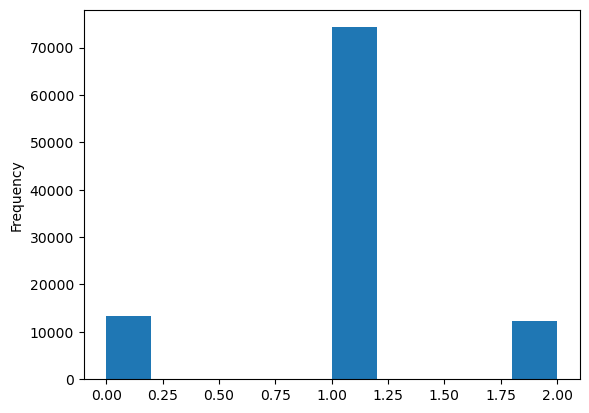

In [20]:
df["strength"].plot(kind="hist")

In [21]:
X = df.iloc[:,1:]
y = df["strength"]

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

<Axes: ylabel='Frequency'>

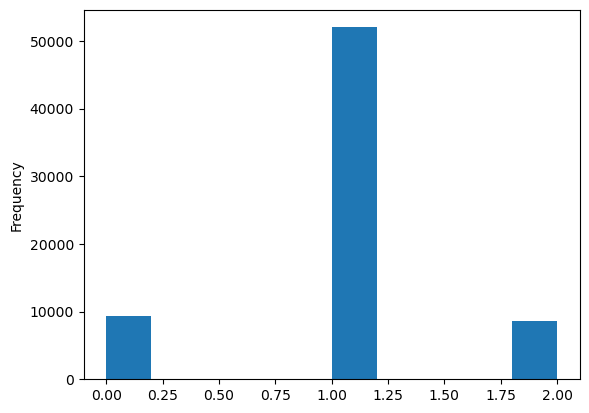

In [23]:
y_train.plot(kind = "hist")

In [24]:
clf = DecisionTreeClassifier(criterion='entropy',max_depth = 2)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

1.0

[Text(0.4, 0.8333333333333334, 'x[0] <= 7.5\nentropy = 1.078\nsamples = 70000\nvalue = [9366, 52030, 8604]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 9366\nvalue = [9366, 0, 0]'),
 Text(0.6, 0.5, 'x[0] <= 13.5\nentropy = 0.589\nsamples = 60634\nvalue = [0, 52030, 8604]'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.0\nsamples = 52030\nvalue = [0, 52030, 0]'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.0\nsamples = 8604\nvalue = [0, 0, 8604]')]

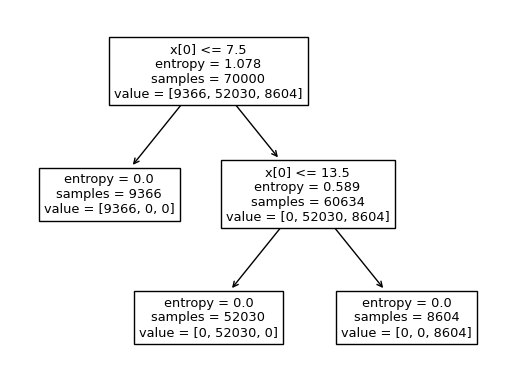

In [25]:
from sklearn.tree import plot_tree
plot_tree(clf)


In [26]:
y_test_predictions = clf.predict(X_test)

In [27]:
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

# Generate confusion matrix for the predictions
conf_matrix = confusion_matrix(y_test, y_test_predictions)
conf_matrix

array([[ 4062,     0,     0],
       [    0, 22248,     0],
       [    0,     0,  3690]], dtype=int64)

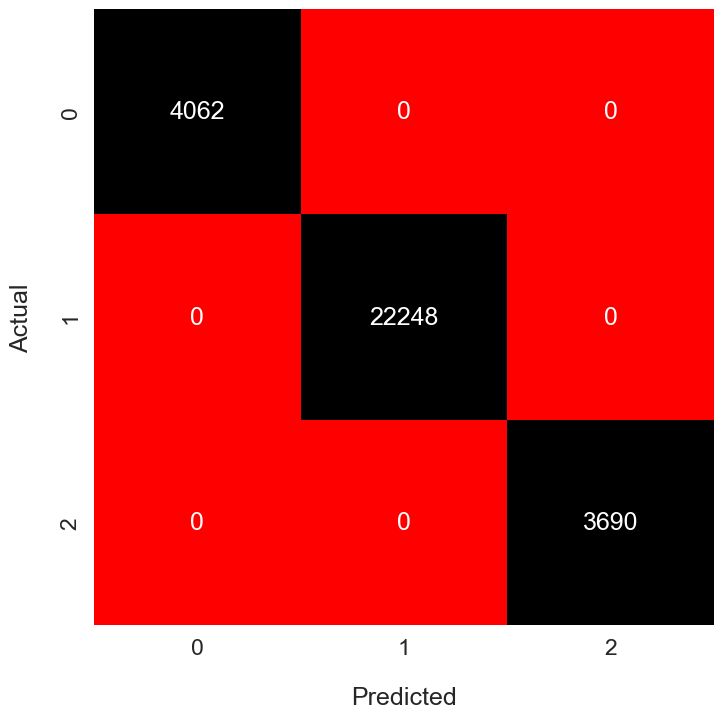

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,8))
sns.set(font_scale = 1.5)

ax = sns.heatmap(
    conf_matrix, # confusion matrix 2D array 
    annot=True, # show numbers in the cells
    fmt='d', # show numbers as integers
    cbar=False, # don't show the color bar
    cmap='flag', # customize color map
    vmax=175 # to get better color contrast
)

ax.set_xlabel("Predicted", labelpad=20)
ax.set_ylabel("Actual", labelpad=20)
plt.show()

In [29]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators= 150, n_jobs = -1)
forest = forest.fit(X_train,y_train)
forest.score(X_test,y_test)

1.0

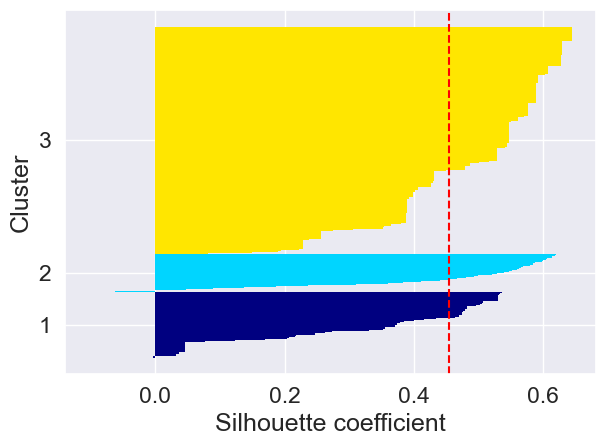

In [40]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

km = KMeans(n_clusters=3,
            init='k-means++',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X_train)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X_train, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0,
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
#plt.savefig('images/11_04.png', dpi=300)
plt.show()

In [41]:
plt.savefig('passwordsSilhouette.png')

<Figure size 640x480 with 0 Axes>